In [1]:
import numpy as np
import pandas as pd
import csv
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [3]:
# Load all data in
data_dir = './data'
train_data_raw = pd.read_csv(data_dir + '/train.csv')
train_label_raw = pd.read_csv(data_dir + '/train_labels.csv')
test_data_raw = pd.read_csv(data_dir + '/test.csv')
specs = pd.read_csv(data_dir + '/specs.csv')

In [4]:
train_data_raw.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0,""event_code"":2000}",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""total_duration"":6758,""event_count"":2,""game_time"":53,""event_code"":3010}",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!"",""identifier"":""Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape"",""media_type"":""audio"",""duration"":6919,""event_count"":3,""game_time"":6972,""event_code"":3110}",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [5]:
test_data_raw.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""game_time"":0,""event_code"":2000}",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [6]:
train_label_raw.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [7]:
specs.head()

,event_id,info,args
0,2b9272f4,"The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""","[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""name"":""level"",""type"":""int"",""info"":""number of the current level when the event takes place or 0 if no level""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""type"":""string"",""info"":""a unique identifier for this piece of instruction""},{""name"":""media_type"",""type"":""string"",""info"":""the type of media that has just played:\n'audio' || 'animation' || 'other'""},{""name"":""duration"",""type"":""int"",""info"":""the duration of the media playback in milliseconds""},{""name"":""event_count"",""type"":""int"",""info"":""session event counter""},{""name"":""event_code"",""type"":""int"",""info"":""event class identifier""}]"
1,df4fe8b6,"The end of system-initiated feedback (Incorrect) event occurs when the game finishes delivering feedback to the player in response to an incorrect round attempt (pressing the go button with the incorrect answer). It contains information that describes the content of the instruction. These events are used to determine the effectiveness of the feedback. We can answer questions like, ""how much time elapsed while the game was presenting feedback?""","[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""type"":""string"",""info"":""a unique identifier for this piece of instruction""},{""name"":""media_type"",""type"":""string"",""info"":""the type of media that has just played:\n'audio' || 'animation' || 'other'""},{""name"":""duration"",""type"":""int"",""info"":""the duration of the media playback in milliseconds""},{""name"":""event_count"",""type"":""int"",""info"":""session event counter""},{""name"":""event_code"",""type"":""int"",""info"":""event class identifier""}]"
2,3babcb9b,"The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that describes the content of the instruction including duration. These events are used to determine the effectiveness of the instructions and the amount of time they consume. We can answer questions like, ""how much time elapsed while the game was presenting instruction?""","[{""name"":""game_time"",""type"":""int"",""info"":""millisecond count since start of game""},{""name"":""round"",""type"":""int"",""info"":""number of the current round when the event takes place or 0 if no round""},{""name"":""description"",""type"":""string"",""info"":""the text or description of the instruction""},{""name"":""identifier"",""type"":""string"",""info"":""a unique identifier for this piece of instruction""},{""name"":""media_type"",""type"":""string"",""info"":""the type of media that has just played:\n'audio' || 'animation' || 'other'""},{""name"":""duration"",""type"":""int"",""info"":""the duration of the media playback in milliseconds""},{""name"":""event_count"",""type"":""int"",""info"":""session event counter""},{""name"":""event_code"",""type"":""int"",""info"":""event class identifier""}]"
3,7f0836bf,"The end of system-initiated instruction event occurs when th

In [8]:
print(train_data_raw.shape)
print(test_data_raw.shape)

(11341042, 11)
(1156414, 11)


In [9]:
# Check missing values
print(train_data_raw.isnull().values.any())
print(test_data_raw.isnull().values.any())

False
False


In [10]:
print('Number of unique installation ids in training data: ', train_data_raw['installation_id'].nunique())
print('Number of unique installation ids in test data: ', test_data_raw['installation_id'].nunique())
lst1 = train_data_raw['installation_id'].unique()
lst2 = test_data_raw['installation_id'].unique()
print('The number of installations appear in both training and test data: ', len(list(set(lst1) & set(lst2))))

Number of unique installation ids in training data:  17000
Number of unique installation ids in test data:  1000
The number of installations appear in both training and test data:  0


In [11]:
train_event = train_data_raw['event_id'].to_list()
test_event = test_data_raw['event_id'].to_list()
specs_event = specs['event_id'].to_list()
# Check if all training event_id can be found in specs.csv
if(all(x in specs_event for x in train_event)): 
    print('All training event_id exist in specs.csv')
# Check if all test event_id can be found in specs.csv
if(all(x in specs_event for x in test_event)): 
    print('All test event_id exist in specs.csv')

All training event_id exist in specs.csv
All test event_id exist in specs.csv


In [12]:
# Show unique events
print(train_data_raw['event_code'].unique())
print(test_data_raw['event_code'].unique())

[2000 3010 3110 4070 4090 4030 4035 4021 4020 4010 2080 2083 2040 2020
 2030 3021 3121 2050 3020 3120 2060 2070 4031 4025 5000 5010 2081 2025
 4022 2035 4040 4100 2010 4110 4045 4095 4220 2075 4230 4235 4080 4050]
[2000 4010 3010 3110 2020 4070 4030 4035 4020 3020 3120 2030 3021 3121
 2025 4100 2010 4025 4021 2060 2070 2080 2081 2040 2050 2083 5000 5010
 2075 4031 4045 4040 2035 4220 4022 4090 4110 4095 4230 4235 4050 4080]


In [13]:
print(train_data_raw['title'].unique())
print(train_data_raw['world'].unique())
print(test_data_raw['title'].unique())
print(test_data_raw['world'].unique())

['Welcome to Lost Lagoon!' 'Magma Peak - Level 1'
 'Sandcastle Builder (Activity)' 'Scrub-A-Dub' 'Magma Peak - Level 2'
 'Dino Drink' 'Tree Top City - Level 1' 'Ordering Spheres'
 'Watering Hole (Activity)' 'Slop Problem' 'All Star Sorting'
 'Costume Box' 'Fireworks (Activity)' '12 Monkeys'
 'Tree Top City - Level 2' 'Flower Waterer (Activity)' "Pirate's Tale"
 'Mushroom Sorter (Assessment)' 'Air Show' 'Treasure Map'
 'Tree Top City - Level 3' 'Crystals Rule' 'Rulers'
 'Bug Measurer (Activity)' 'Bird Measurer (Assessment)' 'Bubble Bath'
 'Bottle Filler (Activity)' 'Dino Dive' 'Crystal Caves - Level 1'
 'Chow Time' 'Cauldron Filler (Assessment)' 'Balancing Act'
 'Crystal Caves - Level 2' 'Crystal Caves - Level 3'
 'Chicken Balancer (Activity)' 'Lifting Heavy Things' 'Pan Balance'
 'Happy Camel' 'Honey Cake' 'Cart Balancer (Assessment)'
 'Heavy, Heavier, Heaviest' 'Egg Dropper (Activity)'
 'Chest Sorter (Assessment)' 'Leaf Leader']
['NONE' 'MAGMAPEAK' 'TREETOPCITY' 'CRYSTALCAVES']
['Welc

In [14]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.savefig(title + '.jpg')
    plt.show()  

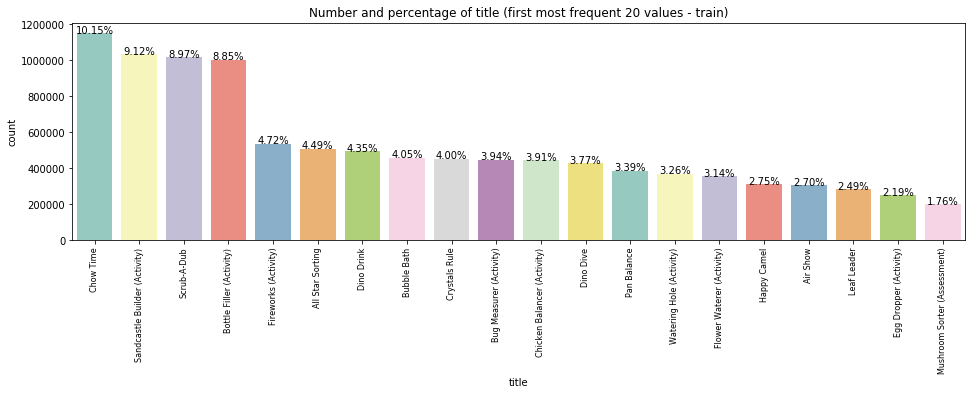

In [15]:
plot_count('title', 'title (first most frequent 20 values - train)', train_data_raw, size=4)

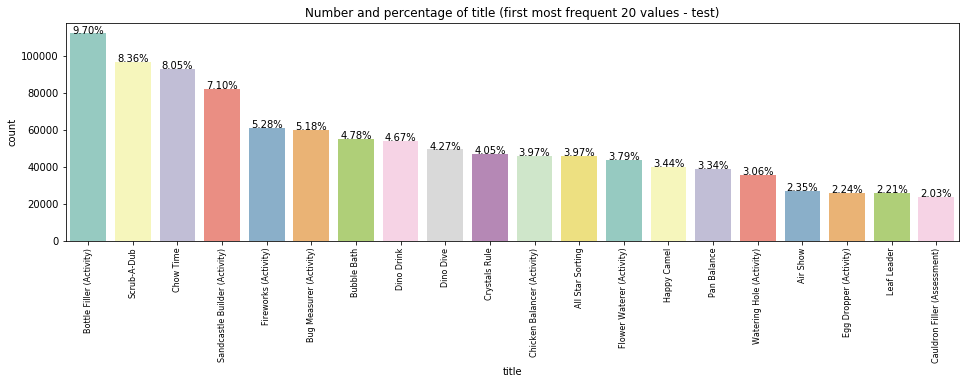

In [16]:
plot_count('title', 'title (first most frequent 20 values - test)', test_data_raw, size=4)

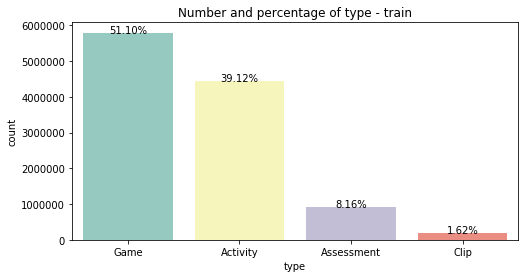

In [17]:
plot_count('type', 'type - train', train_data_raw, size=2)

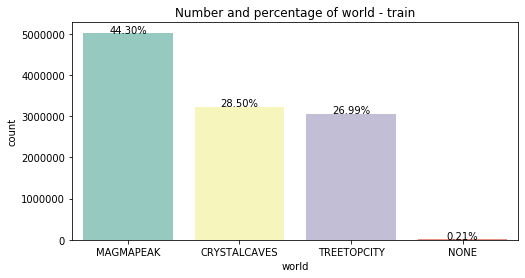

In [18]:
plot_count('world', 'world - train', train_data_raw, size=2)

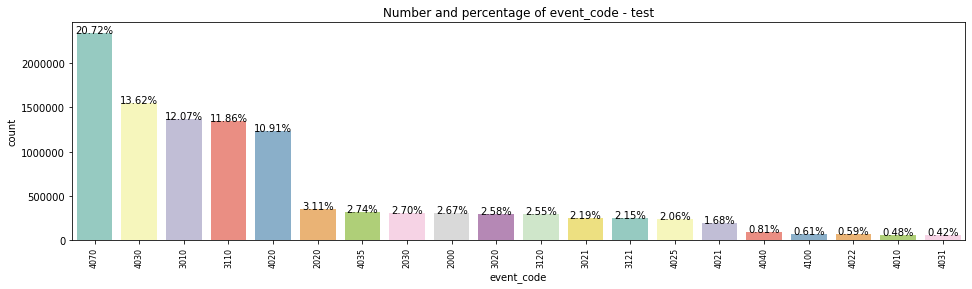

In [19]:
plot_count('event_code', 'event_code - test', train_data_raw, size=4)

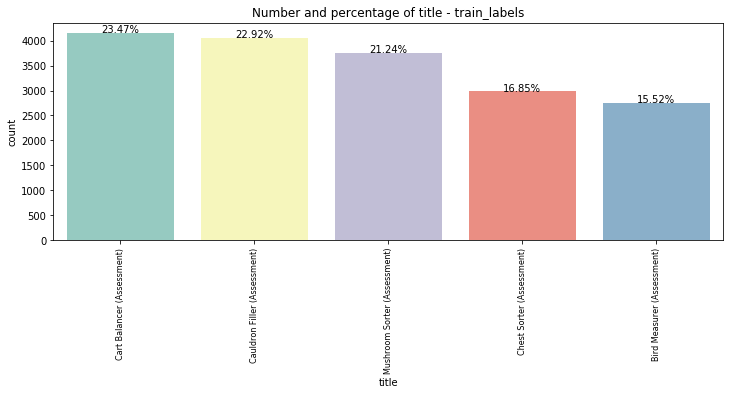

In [20]:
plot_count('title', 'title - train_labels', train_label_raw, size=3)

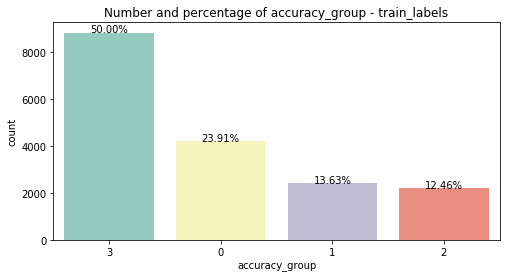

In [21]:
plot_count('accuracy_group', 'accuracy_group - train_labels', train_label_raw, size=2)